EDA

Load CSV Files

In [147]:
import pandas as pd
origin_data = pd.read_csv('Final_data.csv')

Variable Explanation

In [148]:
#Examine the columns
origin_data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'year_population', 'have_school', 'have_public_transit'],
      dtype='object')

In [149]:
#Examine Data Type
origin_data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
year_population          int64
have_school              int64
have_public_transit      int64
dtype: object

In [150]:
# Convert 'month' to datetime and set it as the index
origin_data['month'] = pd.to_datetime(origin_data['month'])

In [151]:
# Check for duplicates
duplicate_count = origin_data.duplicated().sum()

# Show the updated 'month' column and the number of duplicates
year_head = origin_data['month'].head()
year_head, duplicate_count

# Remove duplicates
origin_data = origin_data.drop_duplicates()

# Verify removal by checking the new data shape
new_data_shape = origin_data.shape
new_data_shape

(824732, 13)

In [152]:
#First Few Rows
origin_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,3013000,0,0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,3013000,0,0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,3013000,0,0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,3013000,0,0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,3013000,0,0


In [153]:
#Last Few Rows
origin_data.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
826576,2020-09-01,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,5935000,1,0
826577,2020-09-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,5935000,1,0
826578,2020-09-01,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,5935000,1,1
826579,2020-09-01,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,5935000,1,1
826580,2020-09-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,555000.0,5935000,1,1


Observations Explanation

In [154]:
#Size of Dataset
origin_data.shape

(824732, 13)

In [155]:
#Summary Statistics
origin_data.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,year_population,have_school,have_public_transit
count,824732,824732.000000,824732.000000,8.247320e+05,8.247320e+05,824732.000000,824732.000000
mean,2004-09-12 12:10:52.872448128,95.584108,1987.152862,2.936435e+05,4.409296e+06,0.250262,0.100765
min,1990-01-01 00:00:00,28.000000,1966.000000,5.000000e+03,3.013000e+06,0.000000,0.000000
25%,1998-08-01 00:00:00,73.000000,1980.000000,1.810000e+05,3.731000e+06,0.000000,0.000000
50%,2003-08-01 00:00:00,93.000000,1986.000000,2.750000e+05,4.249000e+06,0.000000,0.000000
75%,2010-08-01 00:00:00,114.000000,1994.000000,3.830000e+05,5.074000e+06,1.000000,0.000000
max,2020-09-01 00:00:00,307.000000,2019.000000,1.258000e+06,5.935000e+06,1.000000,1.000000
std,NaN,26.054802,9.448334,1.487287e+05,8.193468e+05,0.433164,0.301017


In [156]:
#Missing Value
origin_data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year_population        0
have_school            0
have_public_transit    0
dtype: int64

Visualization

Import Library

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

Histogram

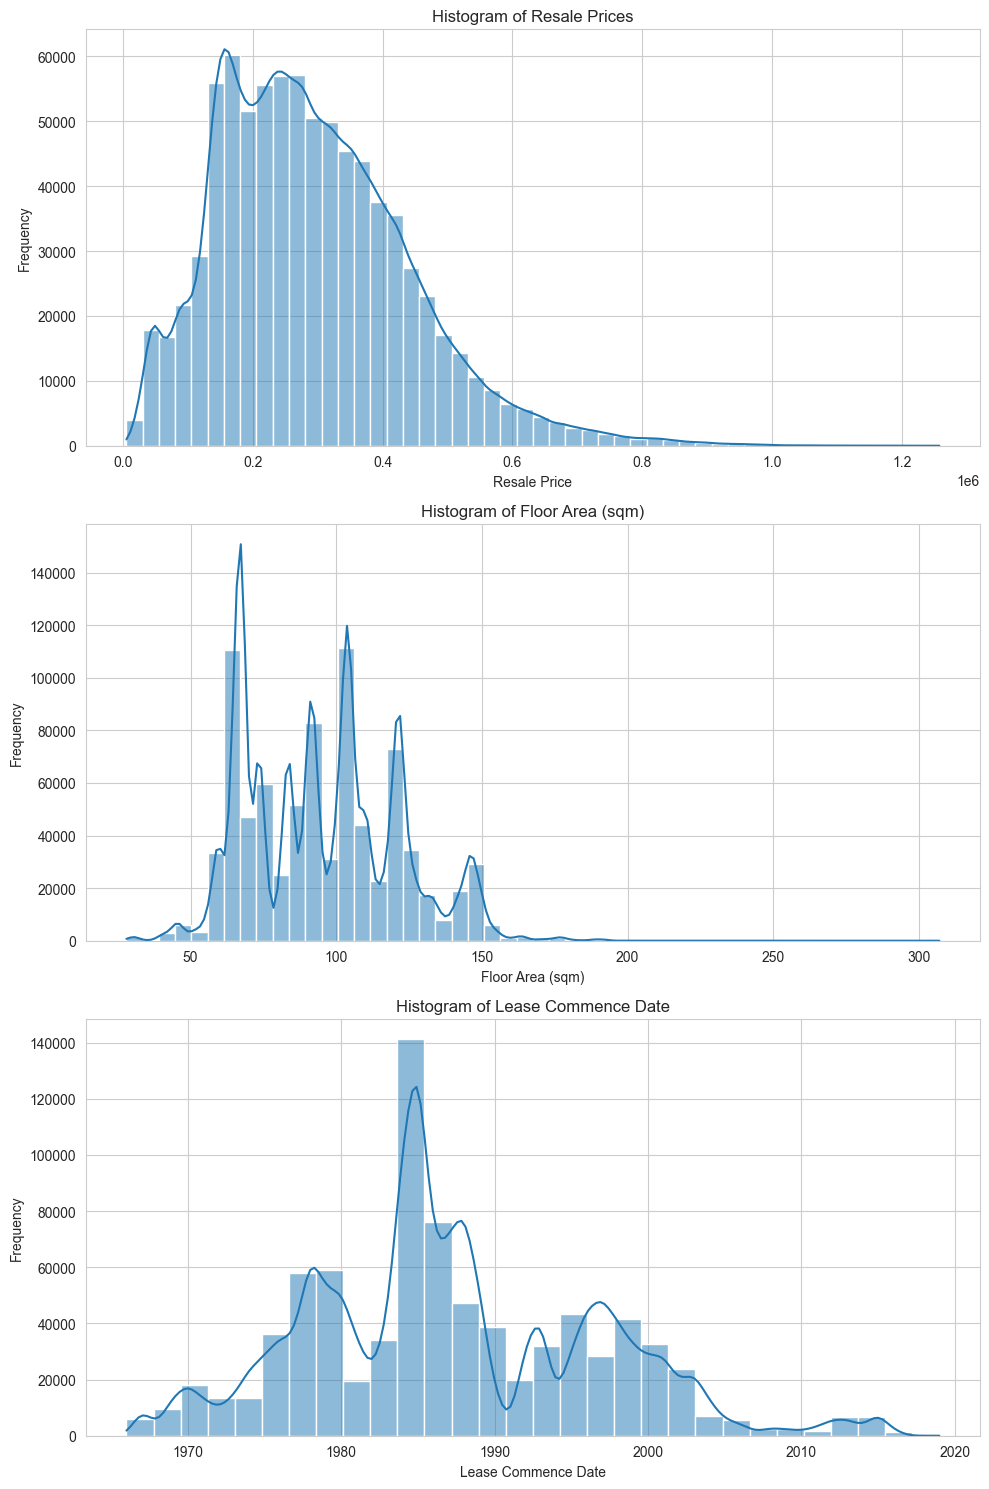

In [158]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating histograms for key variables
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Histogram for resale prices
sns.histplot(origin_data['resale_price'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Resale Prices')
axes[0].set_xlabel('Resale Price')
axes[0].set_ylabel('Frequency')

# Histogram for floor area in square meters
sns.histplot(origin_data['floor_area_sqm'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Histogram of Floor Area (sqm)')
axes[1].set_xlabel('Floor Area (sqm)')
axes[1].set_ylabel('Frequency')

# Histogram for lease commence date
sns.histplot(origin_data['lease_commence_date'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Histogram of Lease Commence Date')
axes[2].set_xlabel('Lease Commence Date')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

BoxPlot

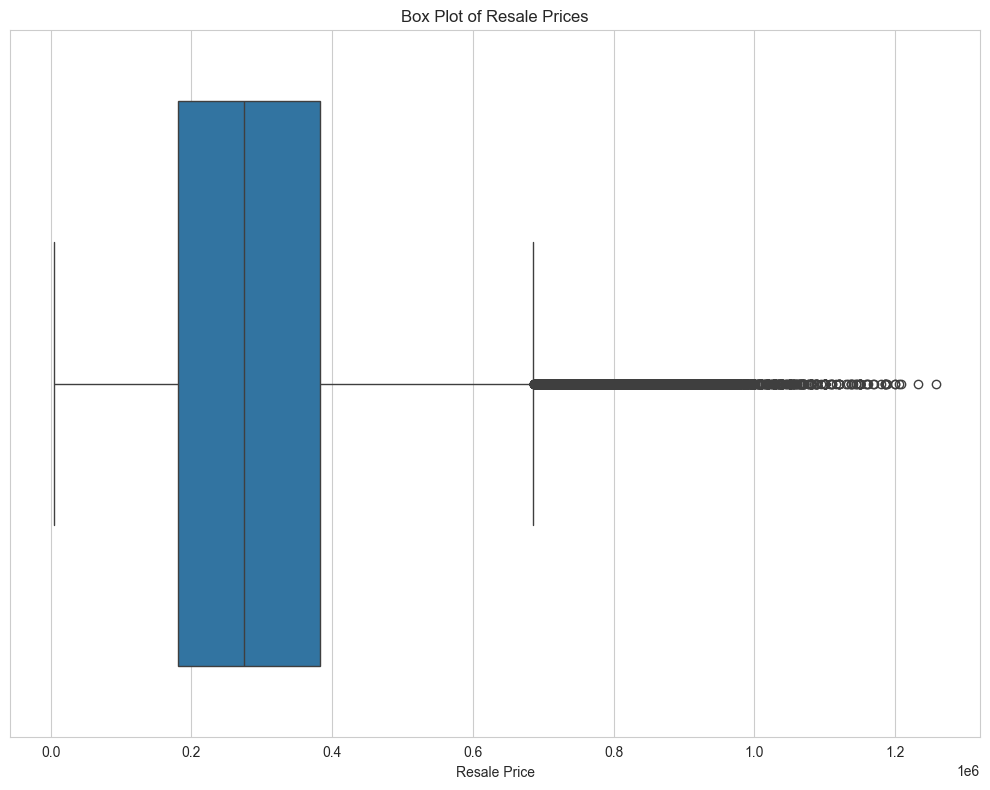

In [159]:
# Creating box plot figure
plt.figure(figsize=(10, 8))
# Box Plot for resale prices
sns.boxplot(x=origin_data['resale_price'])
plt.title('Box Plot of Resale Prices')
plt.xlabel('Resale Price')

plt.tight_layout()
plt.show()

Scatter Plots

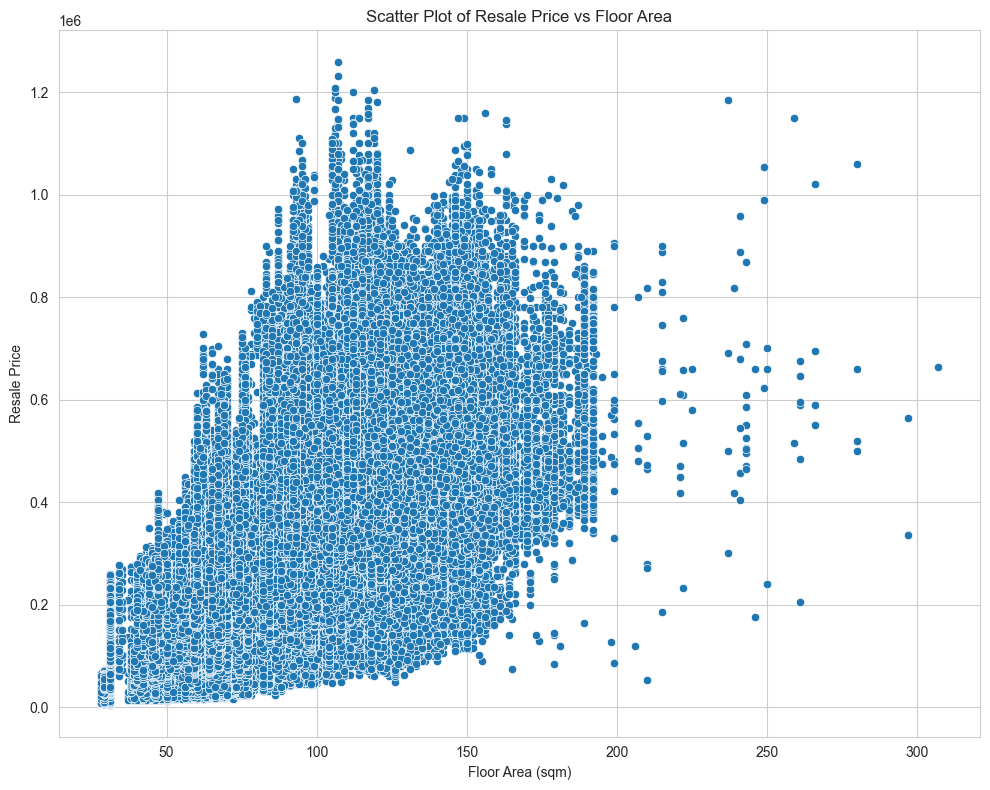

In [160]:
# Creating box plot figure
plt.figure(figsize=(10, 8))
# Scatter Plot for resale price vs floor area
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=origin_data)
plt.title('Scatter Plot of Resale Price vs Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')

plt.tight_layout()
plt.show()

Bar Charts

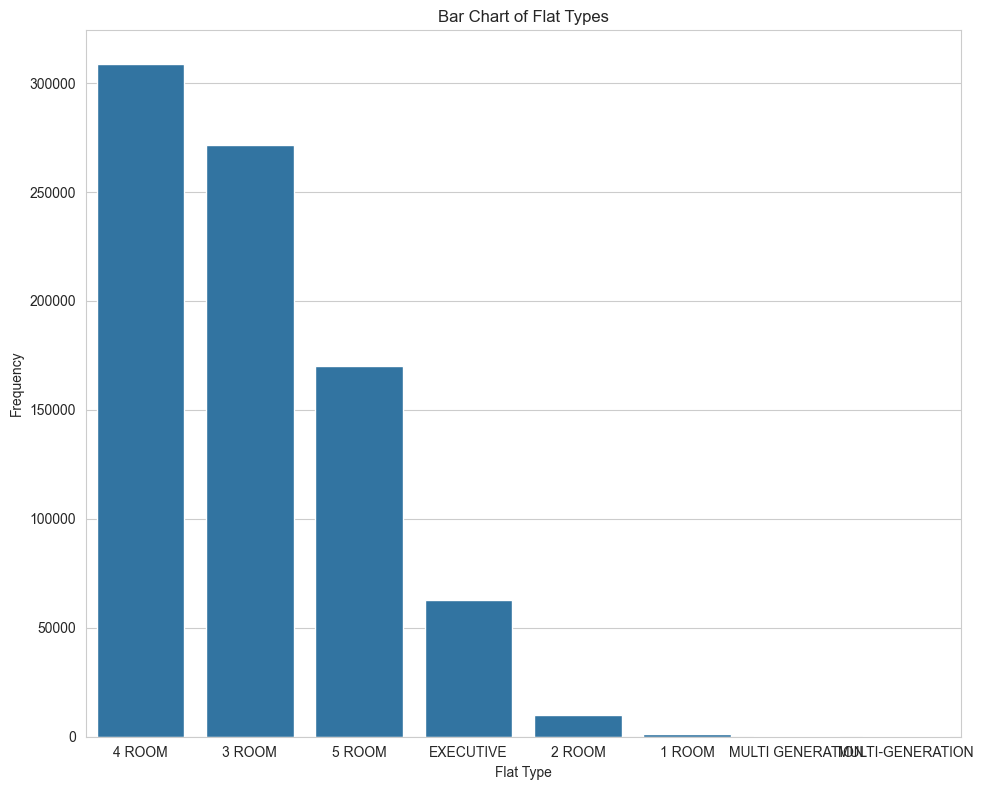

In [161]:
# Creating bar charts figure
plt.figure(figsize=(10, 8))
# Bar Chart of Flat Types
flat_type_counts = origin_data['flat_type'].value_counts()
sns.barplot(x=flat_type_counts.index, y=flat_type_counts.values)
plt.title('Bar Chart of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Time Series Plots

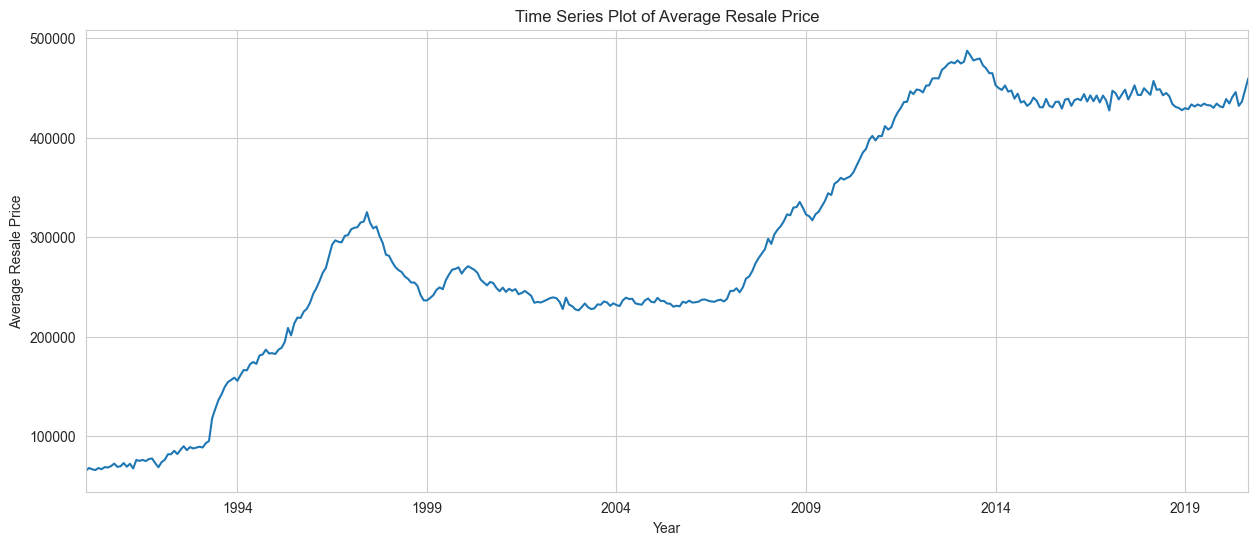

In [162]:
origin_data.set_index('month', inplace=True)

# Group by month and calculate the average resale price
monthly_avg_price = origin_data['resale_price'].resample('M').mean()

# Plotting the time series plot
plt.figure(figsize=(15, 6))
monthly_avg_price.plot()
plt.title('Time Series Plot of Average Resale Price')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()

Heat Maps

Additional Insights

In [163]:
origin_data['town'].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [164]:
origin_data['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [165]:
origin_data['block'].unique()


array(['309', '216', '211', ..., '473A', '294A', '164A'], dtype=object)

In [166]:
origin_data['street_name'].unique()


array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [167]:
origin_data['storey_range'].unique()


array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [168]:
origin_data['floor_area_sqm'].unique()


array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [169]:
origin_data['flat_model'].unique()


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft'], dtype=object)

In [170]:
origin_data['lease_commence_date'].unique()


array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [171]:
origin_data['resale_price'].unique()

array([  9000.,   6000.,   8000., ..., 822888., 671300., 459988.])

Pre-Processing

Print Boxplot again for check

In [172]:
origin_data.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_population,have_school,have_public_transit
month,,,,,,,,,,,,
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,3013000,0,0
1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,3013000,0,0
1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,3013000,0,0


Data Transformation

In [173]:
origin_data.dtypes

town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
year_population          int64
have_school              int64
have_public_transit      int64
dtype: object

One-Hot Encoding

In [174]:
data_encoded = pd.get_dummies(origin_data, columns=['town'])
data_encoded = pd.get_dummies(data_encoded , columns=['block'], sparse=True)
data_encoded = pd.get_dummies(data_encoded , columns=['street_name'], sparse=True)
data_encoded = pd.get_dummies(data_encoded , columns=['flat_model'], sparse=True)
# Display the first few rows of the updated dataset
print(data_encoded.head())


           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     04 TO 06            31.0                 1977   
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     07 TO 09            31.0                 1977   
1990-01-01    3 ROOM     04 TO 06            73.0                 1976   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01        9000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01-01        8000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01

Label Encoding

In [175]:
from sklearn.preprocessing import LabelEncoder

label_encoder_flat_type = LabelEncoder()
label_encoder_storey_range = LabelEncoder()

# Assigning numerical values and storing in another column
data_encoded['flat_type_encoded'] = label_encoder_flat_type.fit_transform(data_encoded['flat_type'])
data_encoded['storey_range_encoded'] = label_encoder_storey_range.fit_transform(data_encoded['storey_range'])

# Display the first few rows of the updated dataset
print(data_encoded.head())

           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     04 TO 06            31.0                 1977   
1990-01-01    1 ROOM     10 TO 12            31.0                 1977   
1990-01-01    1 ROOM     07 TO 09            31.0                 1977   
1990-01-01    3 ROOM     04 TO 06            73.0                 1976   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01        9000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01-01        8000.0          3013000            0                    0   
1990-01-01        6000.0          3013000            0                    0   
1990-01

In [176]:
import pickle
    
# save the iris classification model as a pickle file
label_encoder_flat_type_file = "Label_Encoder_Flat_Type.pkl"
label_encoder_storey_range_file = "Label_Encoder_Storey_Range.pkl" 

with open(label_encoder_flat_type_file, 'wb') as file:  
    pickle.dump(label_encoder_flat_type, file)
    
with open(label_encoder_storey_range_file, 'wb') as file:  
    pickle.dump(label_encoder_storey_range, file)

Data Normalization

In [177]:
# Convert the column to numeric type
data_encoded['year_population'] = pd.to_numeric(data_encoded['year_population'])

In [178]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be normalized
numerical_columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'year_population']

# Create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit and transform the data
data_encoded[numerical_columns] = minmax_scaler.fit_transform(data_encoded[numerical_columns])

# Display the first few rows to see the normalized data
print(data_encoded.head())

           flat_type storey_range  floor_area_sqm  lease_commence_date  \
month                                                                    
1990-01-01    1 ROOM     10 TO 12        0.010753             0.207547   
1990-01-01    1 ROOM     04 TO 06        0.010753             0.207547   
1990-01-01    1 ROOM     10 TO 12        0.010753             0.207547   
1990-01-01    1 ROOM     07 TO 09        0.010753             0.207547   
1990-01-01    3 ROOM     04 TO 06        0.161290             0.188679   

            resale_price  year_population  have_school  have_public_transit  \
month                                                                         
1990-01-01      0.003192              0.0            0                    0   
1990-01-01      0.000798              0.0            0                    0   
1990-01-01      0.002394              0.0            0                    0   
1990-01-01      0.000798              0.0            0                    0   
1990-01

In [179]:
import pickle

# save the iris classification model as a pickle file
scaler_pkl_file = "Scaler.pkl"  

with open(scaler_pkl_file, 'wb') as file:  
    pickle.dump(minmax_scaler, file)

Output the Dataset

In [180]:
# Write the DataFrame to a new CSV file
# data_encoded.to_csv('processed_dataset.csv', index=False)

Sem 2

In [181]:
data = data_encoded

In [182]:
# import pandas as pd
# data = pd.read_csv('processed_dataset.csv')

In [183]:
# import pandas as pd
# chunk_size = 500000  # Number of rows per chunk
# chunks = []

# for chunk in pd.read_csv('processed_dataset.csv', chunksize=chunk_size):
#    chunks.append(chunk)

# data = pd.concat(chunks)

In [184]:
# import dask.dataframe as dd

# df = dd.read_csv('processed_dataset.csv')

# mean_value = df['resale_price'].mean().compute()
# print(mean_value)

# df = df.persist()
# data = df

In [185]:
# reimport library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

ARIMA

In [186]:
# Resample the data monthly and calculate the mean resale price
monthly_data = data['resale_price'].resample('M').mean()

# Display the first few rows of the resampled data
monthly_data.head(), monthly_data.shape

(month
 1990-01-31    0.048193
 1990-02-28    0.050371
 1990-03-31    0.049389
 1990-04-30    0.048692
 1990-05-31    0.050321
 Freq: M, Name: resale_price, dtype: float64,
 (369,))

In [187]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_data)

# Creating output of test results
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                  -1.299612
p-value                          0.629350
#Lags Used                      17.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64

In [188]:
# First differencing
monthly_data_diff = monthly_data.diff().dropna()

# Perform Augmented Dickey-Fuller test again on the differenced data
adf_result_diff = adfuller(monthly_data_diff)

# Creating output of test results for differenced data
adf_output_diff = pd.Series(adf_result_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

adf_output_diff

Test Statistic                  -4.131090
p-value                          0.000860
#Lags Used                      16.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64

In [189]:
train_data = monthly_data_diff[:-12]
test_data = monthly_data_diff[-12:]

In [190]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Running auto_arima to find the best ARIMA model
auto_arima_model = auto_arima(train_data, start_p=0, start_q=0,
                              max_p=5, max_q=5, m=12,
                              start_P=0, seasonal=True,
                              d=None, D=1, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

# Summary of the best model
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-2751.394, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-2624.924, Time=0.19 sec


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-2692.823, Time=0.90 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-2747.135, Time=1.72 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-2626.919, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=-2731.042, Time=0.97 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=-2767.560, Time=1.39 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=-2761.821, Time=3.80 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-2764.878, Time=3.38 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-2763.055, Time=3.08 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-2788.058, Time=3.88 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-2786.425, Time=1.88 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-2786.102, Time=4.14 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-2766.744, Time=2.50 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=-2761.561, Time=3.58 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-2800.373, Time=4.07 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-2810

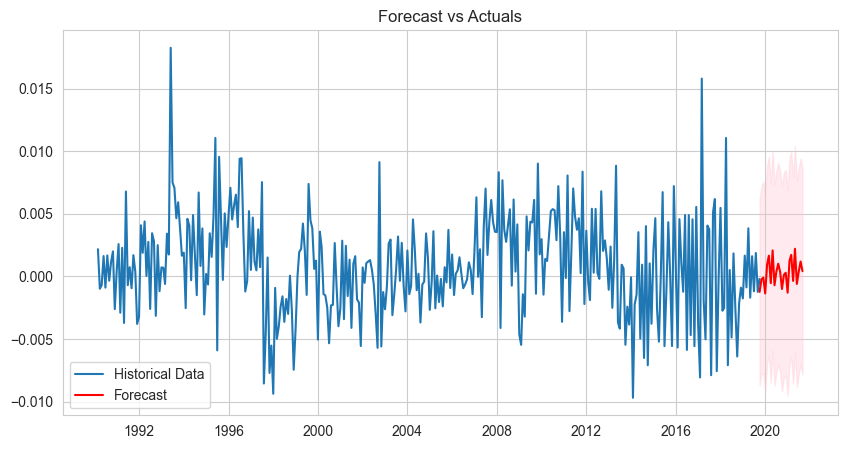

In [191]:
# Forecasting with the best model
n_periods = 24 
forecast, conf_int = auto_arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the forecast alongside historical data
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data, label='Historical Data')
plt.plot(pd.date_range(train_data.index[-1], periods=n_periods, freq='M'), forecast, label='Forecast', color='red')
plt.fill_between(pd.date_range(train_data.index[-1], periods=n_periods, freq='M'), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [192]:
import numpy as np

last_known_value = monthly_data.iloc[-1]

minmax_scaler = MinMaxScaler()

minmax_scaler.fit(origin_data[['resale_price']])

# Reversing the differencing
reintegrated_forecast = np.cumsum(np.insert(forecast, 0, last_known_value))[-n_periods:]

# Reshape for scaling
reintegrated_forecast_reshaped = reintegrated_forecast.reshape(-1, 1)

# Reverse MinMax scaling
unscaled_forecast = minmax_scaler.inverse_transform(reintegrated_forecast_reshaped)

print(unscaled_forecast)

[[458176.96979211]
 [457881.01775966]
 [457771.73008574]
 [456069.36033618]
 [457284.17215993]
 [459363.32609445]
 [458693.44126141]
 [461302.06939224]
 [460421.43648808]
 [460888.94751739]
 [462165.61533285]
 [462615.12517596]
 [461360.07449081]
 [461523.94619885]
 [461896.02850689]
 [460269.53836297]
 [461836.07625517]
 [463998.95185343]
 [463552.91707715]
 [466326.36480433]
 [465578.56509974]
 [466045.9320281 ]
 [467543.77955364]
 [468072.78506632]]


In [193]:
print(last_known_value)

0.3629080527602271


In [194]:
reintegrated_conf_int_lower = np.cumsum(np.insert(conf_int[:, 0], 0, last_known_value))[-n_periods:]
reintegrated_conf_int_upper = np.cumsum(np.insert(conf_int[:, 1], 0, last_known_value))[-n_periods:]

reintegrated_conf_int_lower_reshaped = reintegrated_conf_int_lower.reshape(-1, 1)
reintegrated_conf_int_upper_reshaped = reintegrated_conf_int_upper.reshape(-1, 1)

unscaled_conf_int_lower = minmax_scaler.inverse_transform(reintegrated_conf_int_lower_reshaped)
unscaled_conf_int_upper = minmax_scaler.inverse_transform(reintegrated_conf_int_upper_reshaped)

In [195]:
monthly_data_reshape = monthly_data.values.reshape(-1, 1)
monthly_data_unscale = minmax_scaler.inverse_transform(monthly_data_reshape)
monthly_data_pd = pd.Series(monthly_data_unscale.flatten(), index=monthly_data.index)

In [196]:
import pickle

# save the iris classification model as a pickle file
arima_scaler_pkl_file = "Scaler_ARIMA.pkl"  

with open(arima_scaler_pkl_file, 'wb') as file:  
    pickle.dump(minmax_scaler, file)

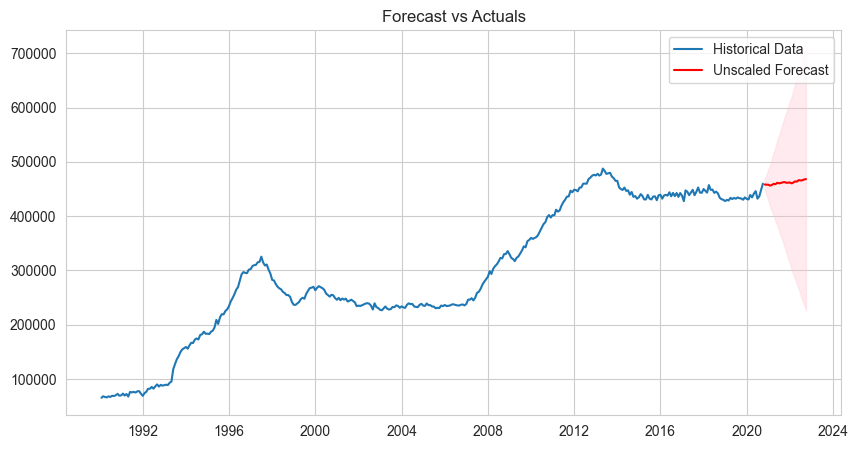

In [197]:
# Plot the forecast alongside historical data with unscaled confidence intervals
plt.figure(figsize=(10, 5))

# Ensure 'historical_data' is your unscaled and non-differenced original data series
plt.plot(monthly_data_pd.index, monthly_data_pd.values, label='Historical Data')

# Plot the unscaled forecasted data
plt.plot(pd.date_range(start=monthly_data_pd.index[-1], periods=n_periods+1, freq='M')[1:], unscaled_forecast.flatten(), label='Unscaled Forecast', color='red')

# Fill between the unscaled confidence intervals
plt.fill_between(pd.date_range(start=monthly_data_pd.index[-1], periods=n_periods+1, freq='M')[1:], unscaled_conf_int_lower.flatten(), unscaled_conf_int_upper.flatten(), color='pink', alpha=0.3)

# Include additional plot formatting as needed
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [198]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual = test_data
predicted = forecast[:12]

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 0.0046786384734646205
RMSE: 0.0056343953115387795


In [199]:
y_true = actual
y_pred = predicted

# Define a function to calculate MAPE, handling cases where the actual value is zero
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    mask = y_true != 0
    return (np.fabs(y_true - y_pred) / y_true)[mask].mean() * 100

# Calculate MAPE using the function
mape = mean_absolute_percentage_error(test_data, forecast[:12])

print(f'MAPE: {mape} %')

MAPE: 14.727055444633983 %


In [200]:
import pickle

# save the iris classification model as a pickle file
arima_model_pkl_file = "ARIMA_model.pkl"  

with open(arima_model_pkl_file, 'wb') as file:  
    pickle.dump(auto_arima_model, file)

LSTM

In [201]:
# Function to create sequences of data for LSTM
def create_dataset(dataset, look_back=12):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Generate the dataset for training LSTM
look_back = 12
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X.shape, y.shape  # Check the shape of the inputs and outputs


((357, 12, 1), (357,))

In [202]:
# Split the data into training and testing sets
train_size = len(X) - 12
test_size = 12

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((345, 12, 1), (12, 12, 1), (345,), (12,))

C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100


345/345 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0847
Epoch 2/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 3/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 4/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015
Epoch 5/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013
Epoch 6/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 7/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9782e-04
Epoch 8/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.9671e-04
Epoch 9/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.6931e-04
Epoch 10/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7863e-04
Epoch 11/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3291e-04
Epoch 12/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.1792e-04
Epoch 13/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1416e-04
Epoch 14/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2315e-04
Epoch 15/100
345/345 ━━

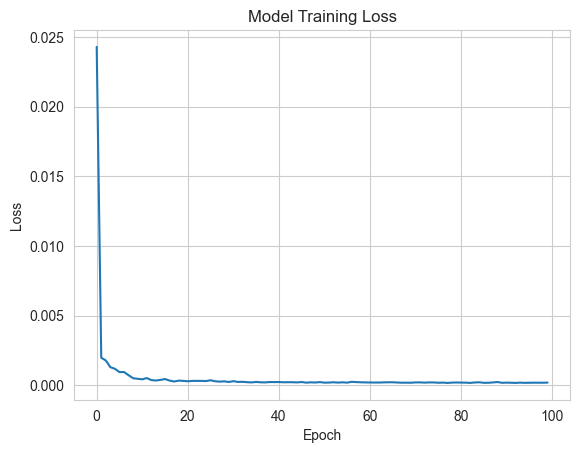

In [203]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1)),  # 50 LSTM units
    Dense(1)  # Output layer
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [204]:
# Step 1: Make predictions on the test data
predicted = lstm_model.predict(X_test)

# Step 2: Calculate performance metrics
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mean_squared_error(y_test, predicted))

# To calculate MAPE, we can use the function provided earlier
mape = mean_absolute_percentage_error(y_test, predicted)

# Print the performance metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape} %')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
MAE: 0.015129506323244446
RMSE: 0.01919134258565311
MAPE: 2.2869205529431893 %


In [205]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Specify the exact dates as an array or list
dates = [
    "2020-10-31", "2020-11-30", "2020-12-31",
    "2021-01-31", "2021-02-28", "2021-03-31",
    "2021-04-30", "2021-05-31", "2021-06-30",
    "2021-07-31", "2021-08-31", "2021-09-30"
]

# Convert dates to pandas datetime index
forecast_dates = pd.to_datetime(dates)

# This should be the scaler you originally used to scale your 'resale_price'
minmax_scaler = MinMaxScaler()

# Fit the scaler to the 'resale_price' data
minmax_scaler.fit(origin_data[['resale_price']])

# Reshape 'predicted_inversed' to 2D array as MinMaxScaler expects 2D input for inverse_transform
predicted_inversed_reshaped = predicted_inversed.reshape(-1, 1)

# Now we can inverse transform the forecasted prices
predicted_inversed_unscaled = minmax_scaler.inverse_transform(predicted_inversed_reshaped)

# Create a DataFrame with the provided dates as the index
predicted_inversed_unscaled_df = pd.DataFrame(predicted_inversed_unscaled, index=forecast_dates, columns=['predicted_price'])

# Print the true predicted prices
print(predicted_inversed_unscaled_df)

            predicted_price
2020-10-31     431635.12500
2020-11-30     429488.59375
2020-12-31     431695.37500
2021-01-31     430749.65625
2021-02-28     429748.62500
2021-03-31     435361.28125
2021-04-30     434521.09375
2021-05-31     439114.78125
2021-06-30     444119.50000
2021-07-31     436016.43750
2021-08-31     435082.43750
2021-09-30     442701.06250


In [206]:
lstm_model_summary = lstm_model.summary()
print(lstm_model_summary)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

None


In [207]:
from tensorflow.keras.models import load_model

# Assuming `lstm_model` is your trained LSTM model
lstm_model.save('LSTM_model.h5')

Prophet

In [208]:
from prophet import Prophet

# Prepare the DataFrame for Prophet
prophet_df = monthly_data.reset_index()
prophet_df.columns = ['ds', 'resale_price']

# Show the prepared DataFrame
prophet_df.head()

,ds,resale_price
0,1990-01-31,0.048193
1,1990-02-28,0.050371
2,1990-03-31,0.049389
3,1990-04-30,0.048692
4,1990-05-31,0.050321


DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\gtyz0\AppData\Local\Temp\tmpqhadokrj\3x9sbu0r.json
DEBUG:cmdstanpy:input tempfile: C:\Users\gtyz0\AppData\Local\Temp\tmpqhadokrj\s000urln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\gtyz0\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=89543', 'data', 'file=C:\\Users\\gtyz0\\AppData\\Local\\Temp\\tmpqhadokrj\\3x9sbu0r.json', 'init=C:\\Users\\gtyz0\\AppData\\Local\\Temp\\tmpqhadokrj\\s000urln.json', 'output', 'file=C:\\Users\\gtyz0\\AppData\\Local\\Temp\\tmpqhadokrj\\prophet_modelq3ai7nzn\\prophet_model-20240420234605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:46:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

            ds      yhat  yhat_lower  yhat_upper
369 2020-10-31  0.340171    0.328369    0.351524
370 2020-11-30  0.339740    0.328157    0.351307
371 2020-12-31  0.338187    0.327149    0.349566
372 2021-01-31  0.335724    0.324656    0.346579
373 2021-02-28  0.337302    0.326583    0.348760
374 2021-03-31  0.337746    0.326327    0.348987
375 2021-04-30  0.337767    0.325909    0.350116
376 2021-05-31  0.339018    0.328334    0.350913
377 2021-06-30  0.337827    0.326161    0.349280
378 2021-07-31  0.337926    0.326229    0.350077
379 2021-08-31  0.338622    0.327727    0.349524
380 2021-09-30  0.339440    0.326715    0.352169


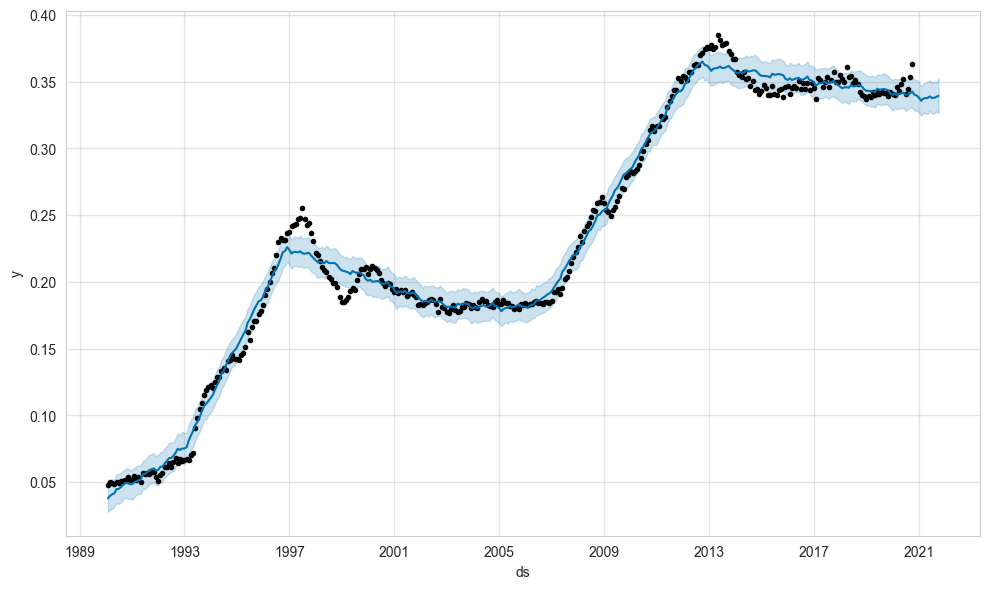

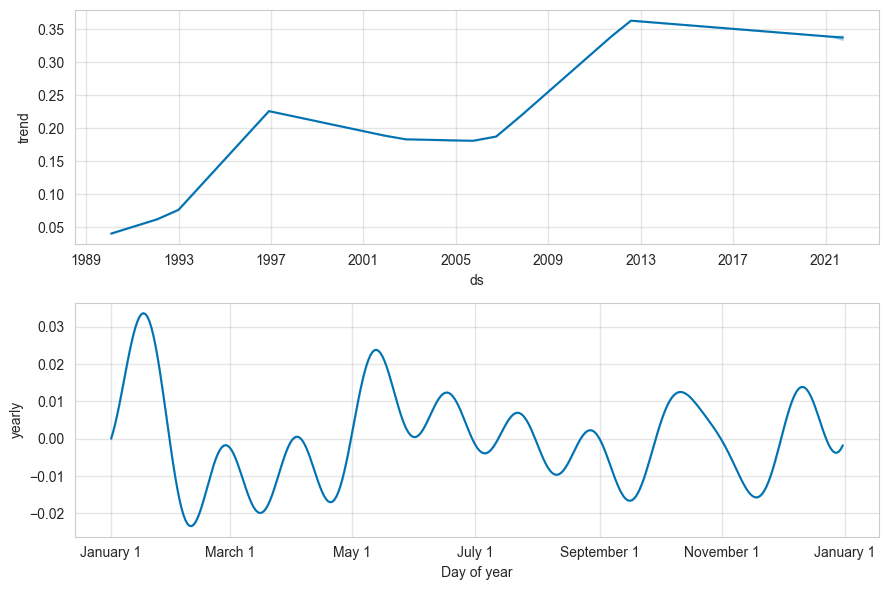

In [209]:
from prophet import Prophet
import pandas as pd

# Prepare the data
prophet_df = monthly_data.reset_index()
prophet_df.columns = ['ds', 'y']

# Initialize the Prophet model
prop_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

# Fit the model
prop_model.fit(prophet_df)

# Create future dataframe for predictions
future = prop_model.make_future_dataframe(periods=12, freq='M')

# Forecast the future
forecast = prop_model.predict(future)

# Plot the forecast
fig1 = prop_model.plot(forecast)
fig2 = prop_model.plot_components(forecast)

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

In [210]:
test_data = monthly_data[-12:]

In [211]:
# Step 1: Extract predicted values
predicted_prophet = forecast['yhat'][-12:].values 
actual_prophet = test_data.values

# Step 2: Calculate performance metrics
mae_prophet = mean_absolute_error(actual_prophet, predicted_prophet)
rmse_prophet = np.sqrt(mean_squared_error(actual_prophet, predicted_prophet))
mape_prophet = np.mean(np.abs((actual_prophet - predicted_prophet) / actual_prophet)) * 100

# Print the performance metrics
print(f'MAE (Prophet): {mae_prophet}')
print(f'RMSE (Prophet): {rmse_prophet}')
print(f'MAPE (Prophet): {mape_prophet} %')

MAE (Prophet): 0.007940110771963068
RMSE (Prophet): 0.010149720727695391
MAPE (Prophet): 2.260560397715025 %


In [212]:
from prophet.plot import plot_plotly, plot_components_plotly

# To visualize the forecast components
plot_components_plotly(prop_model, forecast)

# Select the columns to unscale
scaled_columns = forecast[['yhat', 'yhat_lower', 'yhat_upper']].values  # Getting the numpy array of scaled data

# Inverse transform the scaled predictions
unscaled_predictions = minmax_scaler.inverse_transform(scaled_columns)

# Create a new DataFrame with the unscaled data, preserving the original date column
unscaled_forecast = pd.DataFrame(unscaled_predictions, columns=['yhat', 'yhat_lower', 'yhat_upper'])
unscaled_forecast['ds'] = forecast['ds']

# Print the unscaled forecast DataFrame
print(unscaled_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

            ds           yhat     yhat_lower     yhat_upper
369 2020-10-31  431234.351036  416445.901463  445459.106331
370 2020-11-30  430694.838967  416180.778480  445187.637437
371 2020-12-31  428748.893907  414918.119459  443006.762291
372 2021-01-31  425662.314626  411794.260632  439263.866211
373 2021-02-28  427639.196993  414208.863383  441995.837885
374 2021-03-31  428195.199311  413888.355478  442280.365619
375 2021-04-30  428221.799800  413364.219565  443695.780864
376 2021-05-31  429789.202847  416402.495905  444693.695572
377 2021-06-30  428297.289250  413679.872989  442648.111958
378 2021-07-31  428420.796979  413764.802887  443646.264922
379 2021-08-31  429293.251725  415641.856061  442953.763989
380 2021-09-30  430317.706940  414374.301963  446268.108766


In [213]:
# save the iris classification model as a pickle file
prophet_model_pkl_file = "Prophet_model.pkl"  

with open(prophet_model_pkl_file, 'wb') as file:  
    pickle.dump(prop_model, file)

----------------------------------------------------------------------------------------------

Auto-ARIMA

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima

# auto_arima_model = auto_arima(train, start_p=0, start_q=0,
#                              max_p=5, max_q=5, m=12,
#                              start_P=0, seasonal=True,
#                              d=1, D=1, trace=True,
#                              error_action='ignore',  
#                              suppress_warnings=True, 
#                              stepwise=True)

# auto_arima_model.summary()
